<a href="https://colab.research.google.com/github/Rahneesh/Diabetes-prediction-using-Deep-learning/blob/main/Diabetes_progress_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np

diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

df = pd.DataFrame(X, columns=diabetes.feature_names)
df['target'] = y

df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


Parameters:

- age: Age in years
- sex: Gender of the patient
- bmi: Body mass index
- bp: Average blood pressure
- s1: Total serum cholesterol (tc)
- s2: Low-density lipoproteins (ldl)
- s3: High-density lipoproteins (hdl)
- s4: Total cholesterol / HDL (tch)
- s5: Possibly log of serum triglycerides level (ltg)
- s6: Blood sugar level (glu)

Data feature (X) is already in the scaled format.


In [47]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
bp,0
s1,0
s2,0
s3,0
s4,0
s5,0
s6,0


No missing values

In [48]:
# Normalisation of features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Features are scaled for better performance

In [49]:
X_scaled

array([[ 0.80050009,  1.06548848,  1.29708846, ..., -0.05449919,
         0.41853093, -0.37098854],
       [-0.03956713, -0.93853666, -1.08218016, ..., -0.83030083,
        -1.43658851, -1.93847913],
       [ 1.79330681,  1.06548848,  0.93453324, ..., -0.05449919,
         0.06015558, -0.54515416],
       ...,
       [ 0.87686984,  1.06548848, -0.33441002, ..., -0.23293356,
        -0.98564884,  0.32567395],
       [-0.9560041 , -0.93853666,  0.82123474, ...,  0.55838411,
         0.93616291, -0.54515416],
       [-0.9560041 , -0.93853666, -1.53537419, ..., -0.83030083,
        -0.08875225,  0.06442552]])

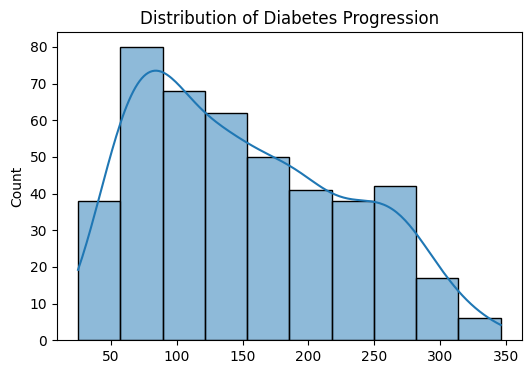

In [50]:
# EDA

# Distribution of target variables
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.histplot(y, kde=True)
plt.title("Distribution of Diabetes Progression")
plt.show()

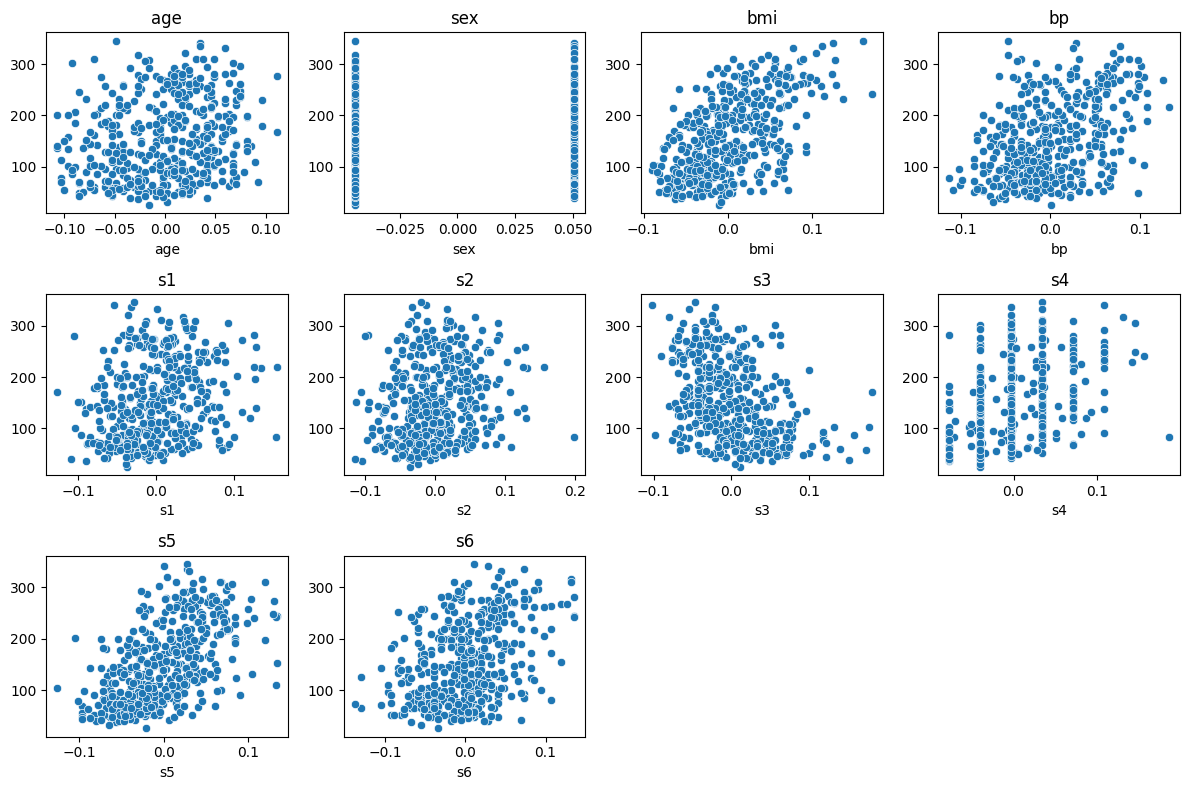

In [51]:
# Distribution of features variables

plt.figure(figsize=(12,8))
for i, feature in enumerate(diabetes.feature_names):
    plt.subplot(3,4,i+1)
    sns.scatterplot(x=df[feature], y=y)
    plt.title(feature)

plt.tight_layout()
plt.show()

In [52]:
# Count of sex

df['sex'].value_counts()

,count
sex,
-0.044642,235
0.050680,207


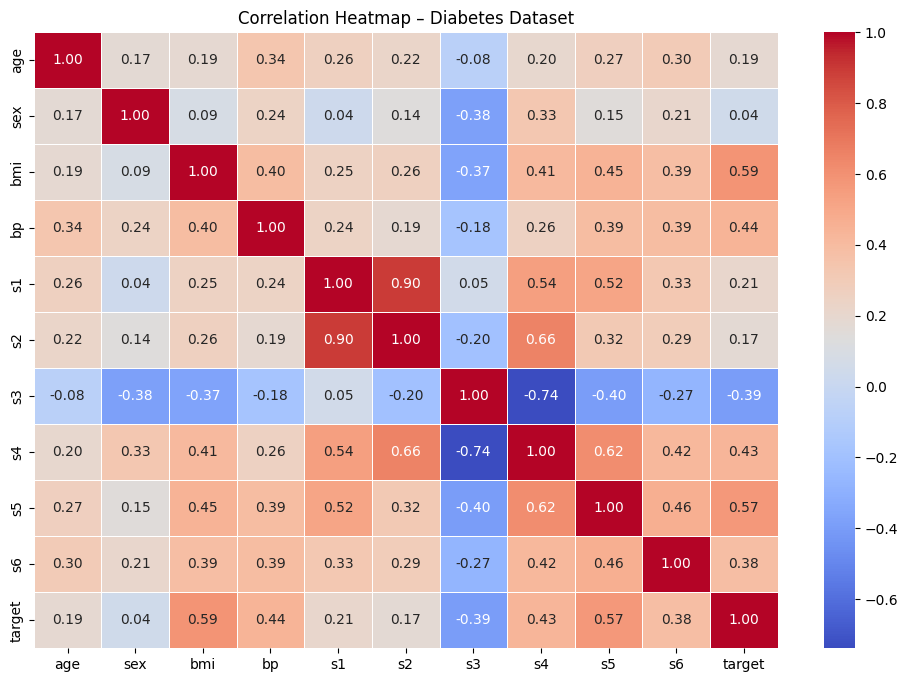

In [53]:
# heatmap for relationship between target variables and features

df_heat = df.copy()
corr = df_heat.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr,annot=True,fmt=".2f",cmap="coolwarm",linewidths=0.5)
plt.title("Correlation Heatmap – Diabetes Dataset")
plt.show()

Diabetis has good corrulation with bmi, cholestrole, bp.

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_scaled.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1)  # Regression output
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 29168.6816 - mae: 151.4115 - val_loss: 27499.5625 - val_mae: 147.4929
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 31049.0977 - mae: 156.8151 - val_loss: 27332.1289 - val_mae: 146.9357
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 32102.4707 - mae: 160.6230 - val_loss: 27143.6250 - val_mae: 146.3051
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 28243.8438 - mae: 150.2686 - val_loss: 26895.6270 - val_mae: 145.4924
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 27970.3047 - mae: 148.6182 - val_loss: 26574.2598 - val_mae: 144.4593
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 29216.9180 - mae: 153.7040 - val_loss: 26153.1562 - val_mae: 143.1249
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 25868.3145 - mae: 142.6125 - val_loss: 25615.1055 - val_mae: 141.4181
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 27513.6289 - mae: 146.9044 - val_loss

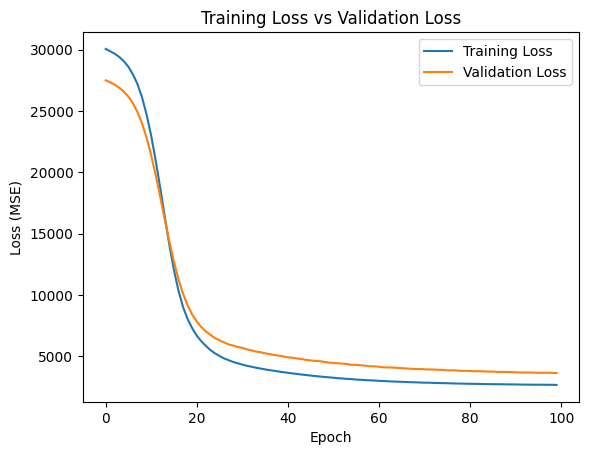

In [56]:
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=16,
    validation_split=0.1,
    verbose=1
)

train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training Loss vs Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

In [57]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Mean Squared Error: 2893.7373001119468
R² Score: 0.4538213630966408


R2 value is very less, the model needs to be improved.

We’ll improve along 4 levers:
- Increase the nuerons per layer
- Regularization (avoid overfitting)
- Optimization (learning dynamics)
- Training discipline (early stopping)


Epoch 1/200


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 28338.5996 - mae: 149.0490 - val_loss: 27465.7012 - val_mae: 147.4243
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 29468.7637 - mae: 153.3907 - val_loss: 27339.9824 - val_mae: 146.9689
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 28627.1406 - mae: 150.0285 - val_loss: 27095.3320 - val_mae: 146.0818
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 28543.6719 - mae: 150.1446 - val_loss: 26490.2734 - val_mae: 143.9235
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 27820.8203 - mae: 146.5650 - val_loss: 25168.9141 - val_mae: 139.2171
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 27268.4062 - mae: 144.6720 - val_loss: 22506.9375 - val_mae: 129.5404
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 21604.0625 - mae: 125.9241 - val_loss: 18004.9980 - val_mae: 111.9822
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 17529.9316 - mae: 111.5972 - val_loss: 11783.7412

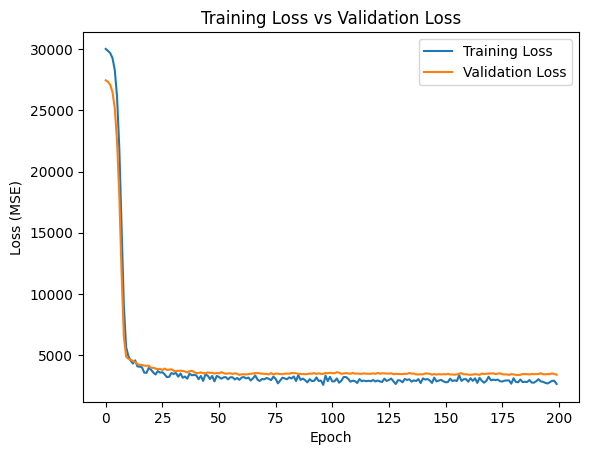

In [63]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


new_model = Sequential([
    Dense(64, activation='relu',
          kernel_regularizer=l2(0.001),
          input_shape=(X_scaled.shape[1],)),

    Dropout(0.2),

    Dense(32, activation='relu',
          kernel_regularizer=l2(0.001)),

    Dropout(0.2),

    Dense(16, activation='relu',
          kernel_regularizer=l2(0.001)),

    Dense(1)
])

mod_optimizer = Adam(learning_rate=0.001)

new_model.compile(
    optimizer=mod_optimizer,
    loss='mse',
    metrics=['mae']
)

early_stop = EarlyStopping(
    monitor='val_loss',        # what KPI to watch
    patience=50,               # how long to wait
    restore_best_weights=True  # roll back to best model
)

history = new_model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=16,
    validation_split=0.1,
    # callbacks=[early_stop],
    verbose=1
)

y_pred = new_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training Loss vs Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

The following is implemented to make the model a better one, however early stopping didn't work well.

- Increased nueroens helps to increase the r2
- Regularization (avoid overfitting)
- Eearly stopping is reducing the r2, but it indicate the reduciton in overfitting rather reduced efficiency.